# This notebook trains the convolution neural network on MNIST dataset in multiple stages optimizing the network at each stage with added features like batch normalization, dropout:

In [122]:
# Uncomment and run the line below if you don't have keras and hvplot installed
# !pip install -q keras
!pip install hvplot

     |████████████████████████████████| 2.3MB 37.7MB/s 
     |████████████████████████████████| 4.0MB 53.0MB/s 
     |████████████████████████████████| 71kB 28.9MB/s 


In [149]:
import numpy as np
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten
from collections import Counter   
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.datasets import mnist
from random import sample 
import holoviews as hv 
import random

hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Load the MNIST dataset pre-available with keras package: This dataset contains the handwritten digits and their corresponding labels

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Show some meta information about the data and a sample image

There are 60000 number images in the training dataset
There are 10000 number images in the test dataset

Figure below shows, how a sample image look likes


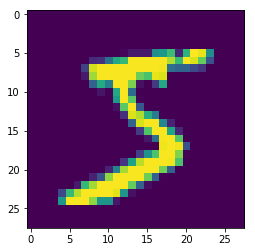

In [150]:
print("There are {} number images in the training dataset".format(X_train.shape[0]))
print("There are {} number images in the test dataset\n".format(X_test.shape[0]))
print("Figure below shows, how a sample image look likes")

# plt.plot(I,'o');
plt.imshow(X_train[0][:,:,0])

## Check the distribution of digits in train and test dataset. There does not see to be bias in the distribution of digits. It seems to be uniform

In [152]:
print("Distribution of digits in train data {}".format(dict(Counter(y_train))))
print("Distribution of digits in test data {}".format(dict(Counter(y_test))))

Distribution of digits in train data {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}
Distribution of digits in test data {7: 1028, 2: 1032, 1: 1135, 0: 980, 4: 982, 9: 1009, 5: 892, 6: 958, 3: 1010, 8: 974}


## See some sample images, how they look in train and test data using Hvplot. Each image is of the size 28 X 28

In [0]:
random.seed(999) ## For reproducibility

:Layout
   .Image.Train.I      :Image   [x,y]   (z)
   .Image.Train.II     :Image   [x,y]   (z)
   .Image.Train.III    :Image   [x,y]   (z)
   .Image.Test.I       :Image   [x,y]   (z)
   .Image.Test.II      :Image   [x,y]   (z)
   .Image.Test.III     :Image   [x,y]   (z)
   .Image.Train.IV     :Image   [x,y]   (z)
   .Image.Train.V      :Image   [x,y]   (z)
   .Image.Train.VI     :Image   [x,y]   (z)
   .Image.Test.IV      :Image   [x,y]   (z)
   .Image.Test.V       :Image   [x,y]   (z)
   .Image.Test.VI      :Image   [x,y]   (z)
   .Image.Train.VII    :Image   [x,y]   (z)
   .Image.Train.VIII   :Image   [x,y]   (z)
   .Image.Train.IX     :Image   [x,y]   (z)
   .Image.Test.VII     :Image   [x,y]   (z)
   .Image.Test.VIII    :Image   [x,y]   (z)
   .Image.Test.IX      :Image   [x,y]   (z)
   .Image.Train.X      :Image   [x,y]   (z)
   .Image.Train.XI     :Image   [x,y]   (z)
   .Image.Train.XII    :Image   [x,y]   (z)
   .Image.Test.X       :Image   [x,y]   (z)
   .Image.Test.XI      :Image   [x,y]   (z)
   .Image.Test.XII     :Image   [x,y]   (z)
   .Image.Train.XIII   :Image   [x,y]   (z)
   .Image.Train.XIV    :Image   [x,y]   (z)
   .Image.Train.XV     :Image   [x,y]   (z)
   .Image.Test.XIII    :Image   [x,y]   (z)
   .Image.Test.XIV     :Image   [x,y]   (z)
   .Image.Test.XV      :Image   [x,y]   (z)
   .Image.Train.XVI    :Image   [x,y]   (z)
   .Image.Train.XVII   :Image   [x,y]   (z)
   .Image.Train.XVIII  :Image   [x,y]   (z)
   .Image.Test.XVI     :Image   [x,y]   (z)
   .Image.Test.XVII    :Image   [x,y]   (z)
   .Image.Test.XVIII   :Image   [x,y]   (z)
   .Image.Train.XIX    :Image   [x,y]   (z)
   .Image.Train.XX     :Image   [x,y]   (z)
   .Image.Train.XXI    :Image   [x,y]   (z)
   .Image.Test.XIX     :Image   [x,y]   (z)
   .Image.Test.XX      :Image   [x,y]   (z)
   .Image.Test.XXI     :Image   [x,y]   (z)
   .Image.Train.XXII   :Image   [x,y]   (z)
   .Image.Train.XXIII  :Image   [x,y]   (z)
   .Image.Train.XXIV   :Image   [x,y]   (z)
   .Image.Test.XXII    :Image   [x,y]   (z)
   .Image.Test.XXIII   :Image   [x,y]   (z)
   .Image.Test.XXIV    :Image   [x,y]   (z)
   .Image.Train.XXV    :Image   [x,y]   (z)
   .Image.Train.XXVI   :Image   [x,y]   (z)
   .Image.Train.XXVII  :Image   [x,y]   (z)
   .Image.Test.XXV     :Image   [x,y]   (z)
   .Image.Test.XXVI    :Image   [x,y]   (z)
   .Image.Test.XXVII   :Image   [x,y]   (z)
   .Image.Train.XXVIII :Image   [x,y]   (z)
   .Image.Train.XXIX   :Image   [x,y]   (z)
   .Image.Train.XXX    :Image   [x,y]   (z)
   .Image.Test.XXVIII  :Image   [x,y]   (z)
   .Image.Test.XXIX    :Image   [x,y]   (z)
   .Image.Test.XXX     :Image   [x,y]   (z)
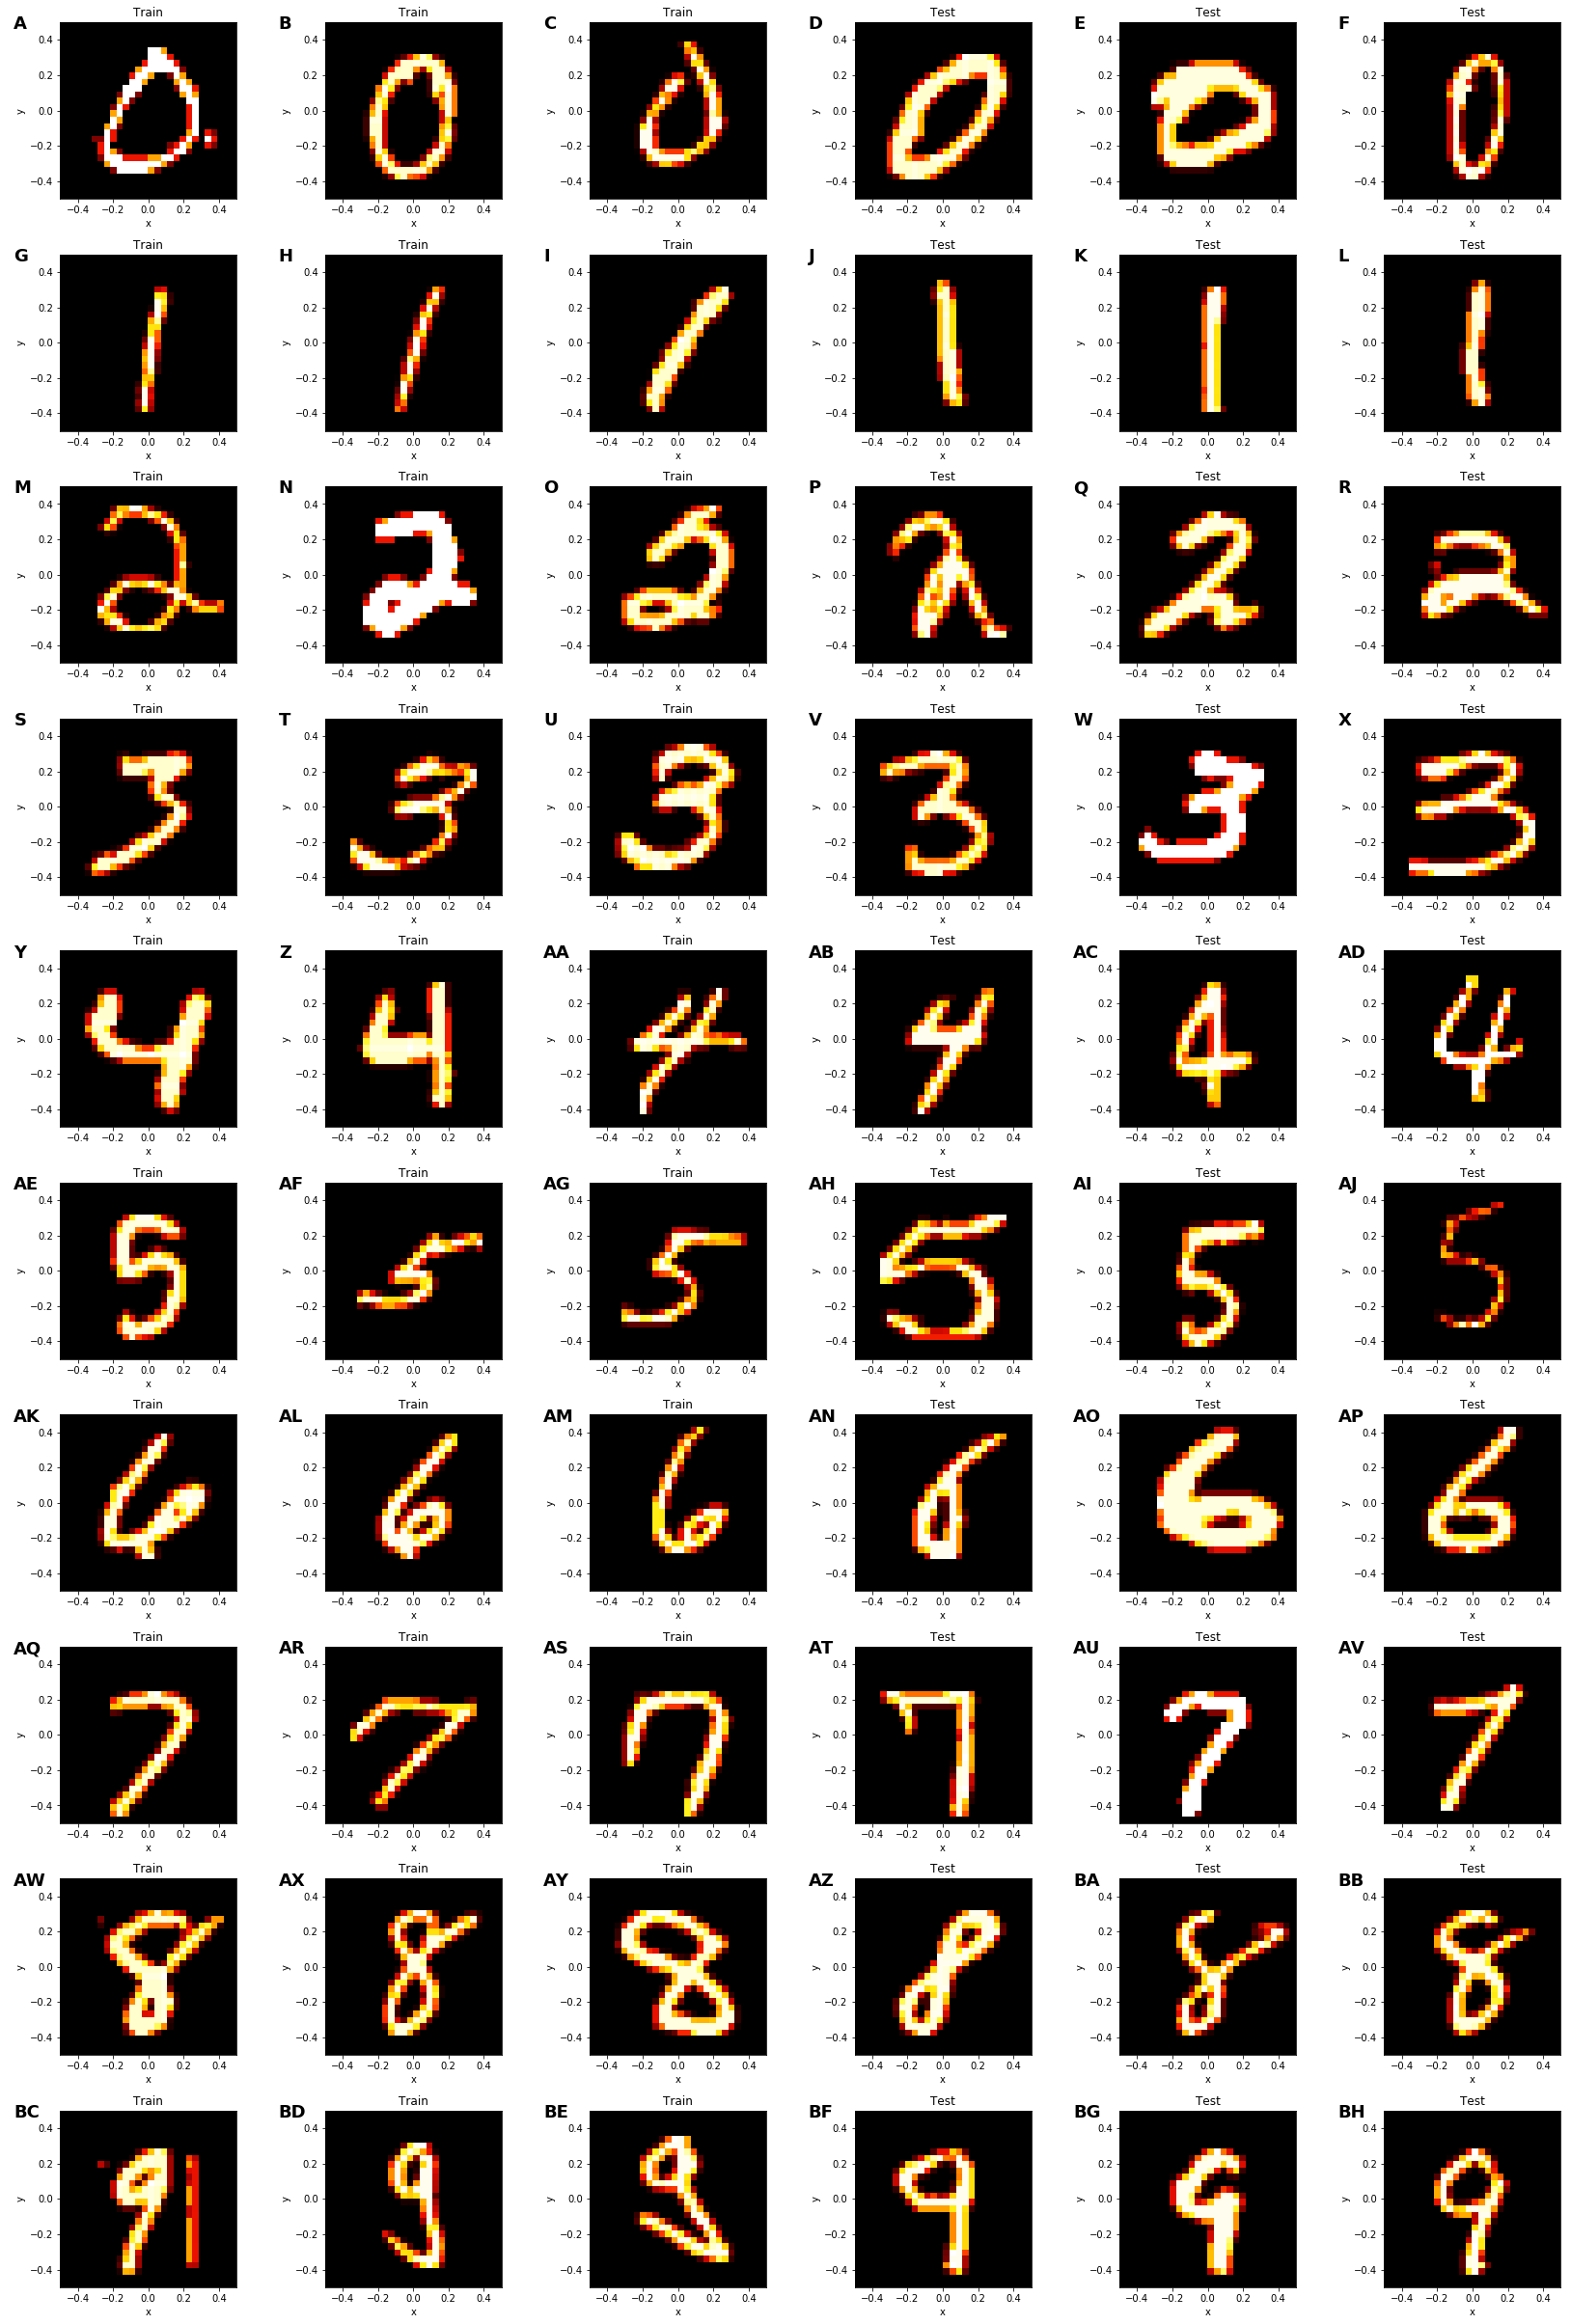

In [154]:
nums=list(range(0,10))
index_list_train=[]
# Take 3 sample randomly for each digit in train and test
for i in nums:  
  index_list_train.append(sample(list(np.where(y_train ==i)[0]),3))

index_list_test=[]
for i in nums:  
  index_list_test.append(sample(list(np.where(y_test ==i)[0]),3))  


train_test_ind=[]
for i in range(0,10):
  a=[]
  for item in index_list_train[i]:
    a.append(hv.Image(X_train[item],label="Train"))
  b=[]
  for item in index_list_test[i]:
    b.append(hv.Image(X_test[item],label="Test"))
  train_test_ind.append(a+b)

train_test_ind_flat=[item for sublist in train_test_ind for item in sublist]

img=train_test_ind_flat[0]
for i in range(1,len(train_test_ind_flat)):
  img=img+train_test_ind_flat[i]
  
img.cols(6) # A very cool way to plot grids of images. Very complex code to do the same in matplotlib

## Reshape the data to have images of size 28X 28 with 1 channel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Conver the datatype and standardize the images

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
X_train1 = X_train.reshape(X_train.shape[0], 28, 28)
X_test1 = X_test.reshape(X_test.shape[0], 28, 28)

In [237]:
len(a)

3

## Visulaizing train and test images after standardization. What has really changed here?

:Layout
   .Image.Train.I      :Image   [x,y]   (z)
   .Image.Train.II     :Image   [x,y]   (z)
   .Image.Train.III    :Image   [x,y]   (z)
   .Image.Test.I       :Image   [x,y]   (z)
   .Image.Test.II      :Image   [x,y]   (z)
   .Image.Test.III     :Image   [x,y]   (z)
   .Image.Train.IV     :Image   [x,y]   (z)
   .Image.Train.V      :Image   [x,y]   (z)
   .Image.Train.VI     :Image   [x,y]   (z)
   .Image.Test.IV      :Image   [x,y]   (z)
   .Image.Test.V       :Image   [x,y]   (z)
   .Image.Test.VI      :Image   [x,y]   (z)
   .Image.Train.VII    :Image   [x,y]   (z)
   .Image.Train.VIII   :Image   [x,y]   (z)
   .Image.Train.IX     :Image   [x,y]   (z)
   .Image.Test.VII     :Image   [x,y]   (z)
   .Image.Test.VIII    :Image   [x,y]   (z)
   .Image.Test.IX      :Image   [x,y]   (z)
   .Image.Train.X      :Image   [x,y]   (z)
   .Image.Train.XI     :Image   [x,y]   (z)
   .Image.Train.XII    :Image   [x,y]   (z)
   .Image.Test.X       :Image   [x,y]   (z)
   .Image.Test.XI      :Image   [x,y]   (z)
   .Image.Test.XII     :Image   [x,y]   (z)
   .Image.Train.XIII   :Image   [x,y]   (z)
   .Image.Train.XIV    :Image   [x,y]   (z)
   .Image.Train.XV     :Image   [x,y]   (z)
   .Image.Test.XIII    :Image   [x,y]   (z)
   .Image.Test.XIV     :Image   [x,y]   (z)
   .Image.Test.XV      :Image   [x,y]   (z)
   .Image.Train.XVI    :Image   [x,y]   (z)
   .Image.Train.XVII   :Image   [x,y]   (z)
   .Image.Train.XVIII  :Image   [x,y]   (z)
   .Image.Test.XVI     :Image   [x,y]   (z)
   .Image.Test.XVII    :Image   [x,y]   (z)
   .Image.Test.XVIII   :Image   [x,y]   (z)
   .Image.Train.XIX    :Image   [x,y]   (z)
   .Image.Train.XX     :Image   [x,y]   (z)
   .Image.Train.XXI    :Image   [x,y]   (z)
   .Image.Test.XIX     :Image   [x,y]   (z)
   .Image.Test.XX      :Image   [x,y]   (z)
   .Image.Test.XXI     :Image   [x,y]   (z)
   .Image.Train.XXII   :Image   [x,y]   (z)
   .Image.Train.XXIII  :Image   [x,y]   (z)
   .Image.Train.XXIV   :Image   [x,y]   (z)
   .Image.Test.XXII    :Image   [x,y]   (z)
   .Image.Test.XXIII   :Image   [x,y]   (z)
   .Image.Test.XXIV    :Image   [x,y]   (z)
   .Image.Train.XXV    :Image   [x,y]   (z)
   .Image.Train.XXVI   :Image   [x,y]   (z)
   .Image.Train.XXVII  :Image   [x,y]   (z)
   .Image.Test.XXV     :Image   [x,y]   (z)
   .Image.Test.XXVI    :Image   [x,y]   (z)
   .Image.Test.XXVII   :Image   [x,y]   (z)
   .Image.Train.XXVIII :Image   [x,y]   (z)
   .Image.Train.XXIX   :Image   [x,y]   (z)
   .Image.Train.XXX    :Image   [x,y]   (z)
   .Image.Test.XXVIII  :Image   [x,y]   (z)
   .Image.Test.XXIX    :Image   [x,y]   (z)
   .Image.Test.XXX     :Image   [x,y]   (z)
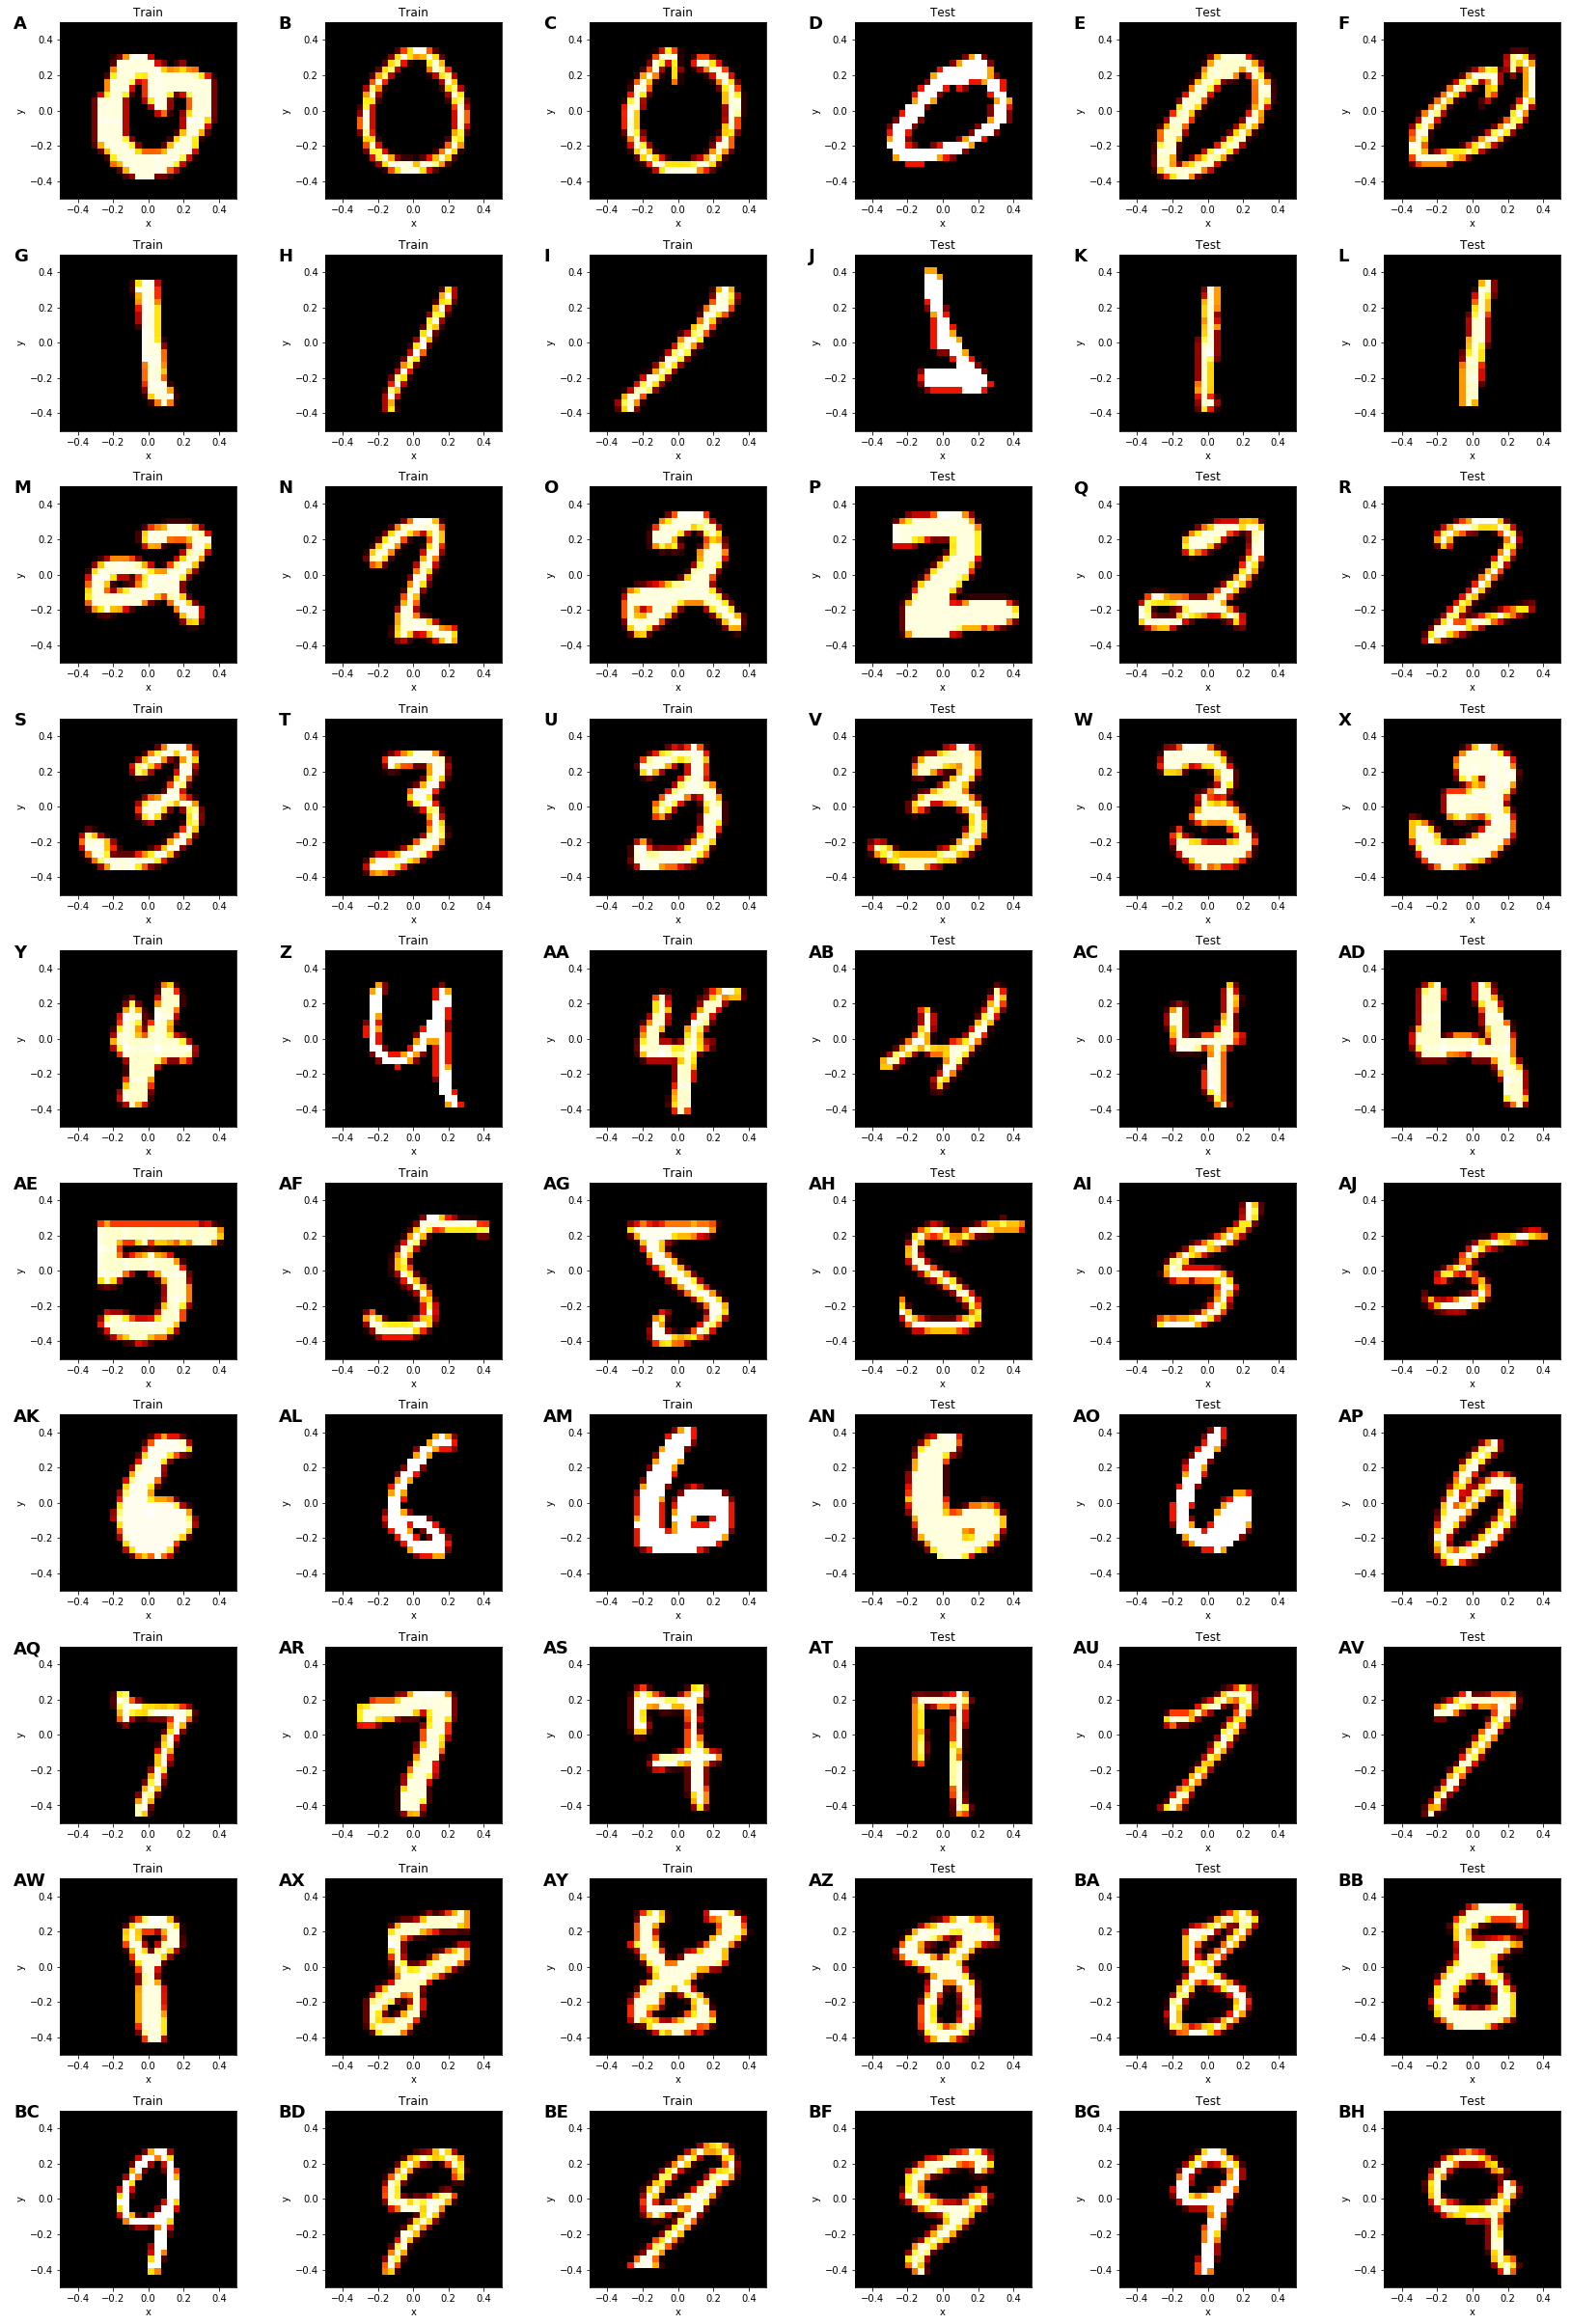

In [161]:
nums=list(range(0,10))
index_list_train=[]
# Take 3 sample randomly for each digit in train and test
for i in nums:  
  index_list_train.append(sample(list(np.where(y_train ==i)[0]),3))

index_list_test=[]
for i in nums:  
  index_list_test.append(sample(list(np.where(y_test ==i)[0]),3))  

train_test_ind=[]
for i in range(0,10):
  a=[]
  for item in index_list_train[i]:
    a.append(hv.Image(X_train1[item],label="Train"))
  b=[]
  for item in index_list_test[i]:
    b.append(hv.Image(X_test1[item],label="Test"))
  train_test_ind.append(a+b)

train_test_ind_flat=[item for sublist in train_test_ind for item in sublist]

img=train_test_ind_flat[0]
for i in range(1,len(train_test_ind_flat)):
  img=img+train_test_ind_flat[i]
  
img.cols(6) # A very cool way to plot grids of images. Very complex code to do the same in matplotlib

## Convert 1-dimensional class of digits to 10 dimentional where the position with digit will be 1 and zero everywhere else

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [189]:
optimizers.

<module 'keras.optimizers' from '/usr/local/lib/python3.6/dist-packages/keras/optimizers.py'>

## Designing the network and checking the performance and issues

In [204]:
from keras.layers import Activation
from keras import optimizers
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
# sgd = optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_16 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [205]:
# model.fit(X_train, Y_train, batch_size=100, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1845 - acc: 0.9473 - val_loss: 0.0939 - val_acc: 0.9737
Epoch 2/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0700 - acc: 0.9782 - val_loss: 0.0742 - val_acc: 0.9775
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0536 - acc: 0.9830 - val_loss: 0.0705 - val_acc: 0.9786
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0770 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0344 - acc: 0.9889 - val_loss: 0.0809 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0277 - acc: 0.9910 - val_loss: 0.0788 - val_acc: 0.9775
Epoch 7/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0757 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [202]:
print(score)

[0.1455221017422471, 0.9764]


In [0]:
y_pred = model.predict(X_test)

In [0]:
def return_incorrect_image_object():
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  num_incorrect_train=len(np.where(y_train!=np.argmax(y_pred_train, axis=1))[0])
  num_incorrect_test=len(np.where(y_test!=np.argmax(y_pred_test, axis=1))[0])
  incorrect_test_index=sample(list(np.where(y_test!=np.argmax(y_pred_test, axis=1))[0]),20)
  incorrect_train_index=sample(list(np.where(y_train!=np.argmax(y_pred_train, axis=1))[0]),20)
  images_test=[]
  for index in incorrect_test_index:
    image_header='Prediction ='+str(np.argmax(y_pred_test, axis=1)[index])+" Correct Label="+str(y_test[index])
    images_test.append(hv.Image(X_test[index],label=image_header))

  images_train=[]  
  for index in incorrect_train_index:
    image_header='Prediction ='+str(np.argmax(y_pred_train, axis=1)[index])+" Correct Label="+str(y_train[index])
    images_train.append(hv.Image(X_train[index],label=image_header))  

  img_test=images_test[0]
  for i in range(1,len(images_test)):
    img_test=img_test+images_test[i]  

  img_train=images_train[0]
  for i in range(1,len(images_train)):
    img_train=img_train+images_train[i]
  return img_train,img_test,num_incorrect_train,num_incorrect_test

In [0]:
img_train,img_test,num_incorrect_train,num_incorrect_test=return_incorrect_image_object()

In [267]:
print("Total number of incorrect training cases:{}".format(str(num_incorrect_train)+"/"+str(X_train.shape[0])))

Total number of incorrect training cases:129/60000


Total number of incorrect training cases:129/60000
Showing some exaples:


:Layout
   .Image.Prediction_equals_3_Correct_Label_equals_0     :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_7.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_8.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_1.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_7.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_1.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_5     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_8.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_0     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_9.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.III :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8.III :Image   [x,y]   (z)
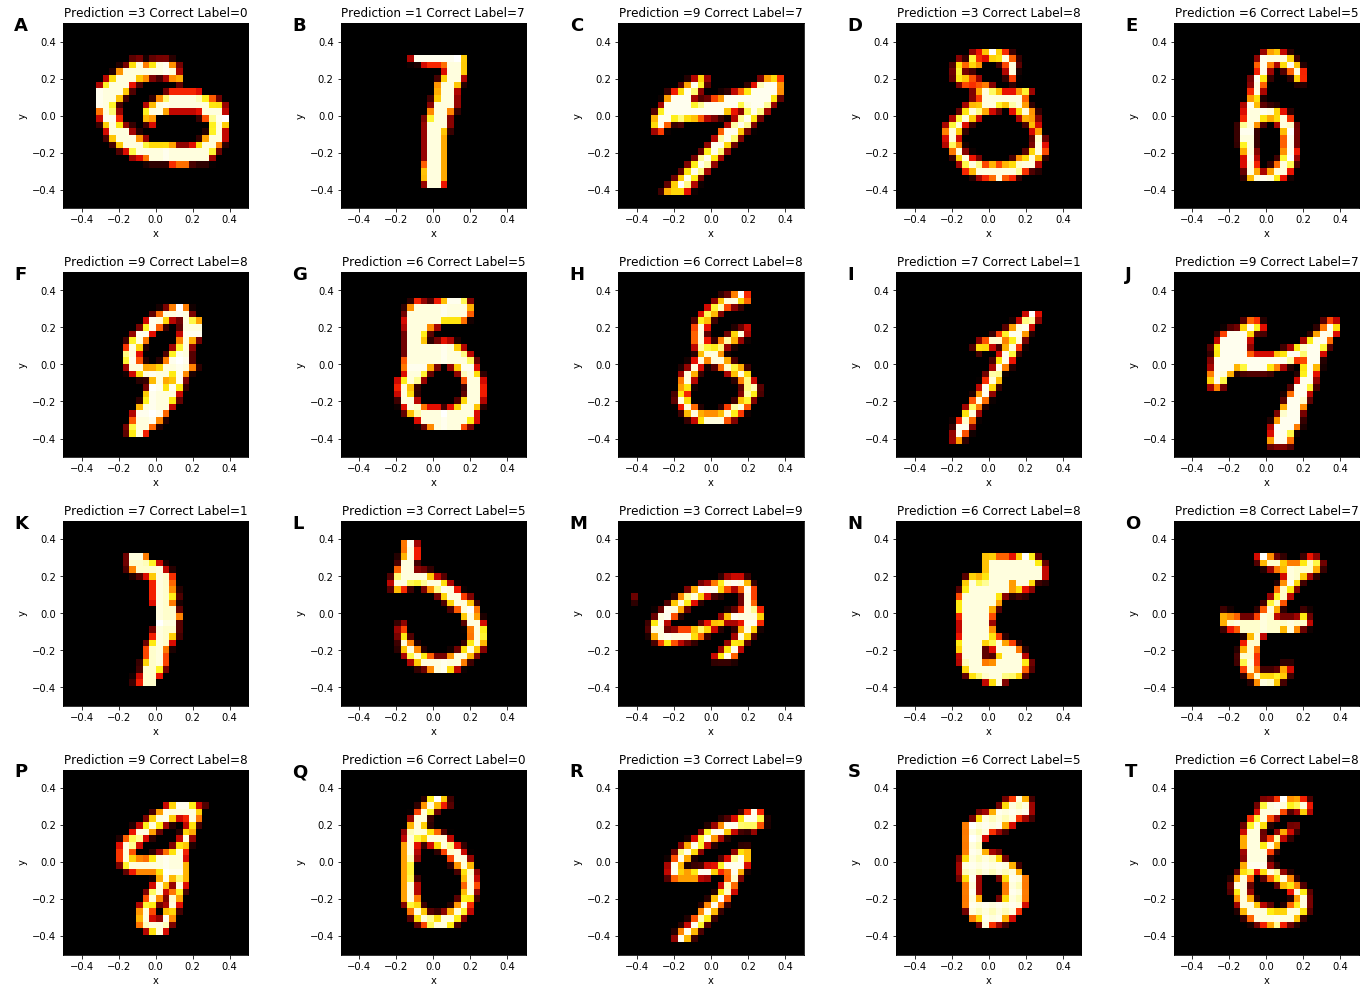

In [268]:
print("Total number of incorrect training cases:{}".format(str(num_incorrect_train)+"/"+str(X_train.shape[0])))
print("Showing some exaples:")
img_train.cols(5)

In [243]:
np.argmax(y_pred, axis=1)[211],np.argmax(y_pred, axis=1)[211]

(3, 3)

:Image   [x,y]   (z)
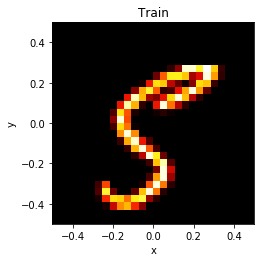

In [238]:
hv.Image(X_test[211],label="Train")

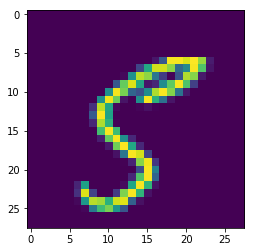

In [234]:
plt.imshow(X_test[211][:,:,0])

In [213]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [231]:
np.where(y_test!=np.argmax(y_pred, axis=1))[0]

array([ 211,  321,  340,  372,  445,  495,  582,  583,  659,  684,  717,
        844,  895,  938,  947,  956,  965, 1014, 1017, 1039, 1112, 1156,
       1202, 1226, 1232, 1242, 1247, 1319, 1326, 1378, 1393, 1414, 1415,
       1530, 1553, 1609, 1621, 1709, 1737, 1754, 1790, 1828, 1883, 1901,
       1903, 2016, 2035, 2098, 2109, 2118, 2129, 2130, 2135, 2182, 2189,
       2225, 2266, 2292, 2293, 2369, 2378, 2387, 2406, 2414, 2454, 2462,
       2488, 2597, 2654, 2720, 2760, 2896, 2921, 2930, 2939, 2953, 2970,
       2995, 3030, 3060, 3062, 3117, 3206, 3330, 3422, 3503, 3520, 3555,
       3558, 3559, 3597, 3599, 3726, 3727, 3730, 3749, 3751, 3757, 3778,
       3780, 3808, 3902, 3906, 4027, 4065, 4075, 4078, 4176, 4193, 4199,
       4224, 4238, 4248, 4289, 4350, 4369, 4405, 4497, 4500, 4507, 4548,
       4571, 4575, 4578, 4671, 4740, 4761, 4807, 4860, 5140, 5228, 5331,
       5457, 5634, 5654, 5655, 5734, 5749, 5752, 5828, 5887, 5888, 5937,
       5950, 5955, 5982, 6071, 6091, 6166, 6173, 64

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[4.30717572e-19 1.81044597e-16 9.30004229e-13 7.10721565e-07
  1.41822329e-18 6.61874459e-14 8.14857409e-29 9.99999285e-01
  7.25173047e-12 2.16448992e-09]
 [1.85796278e-09 1.91920194e-07 9.99999404e-01 1.78691756e-10
  3.66094791e-21 1.50053223e-12 3.72028893e-07 9.49056564e-20
  4.18227085e-11 9.02213959e-19]
 [7.06407044e-10 9.99685287e-01 6.42073792e-06 2.97386782e-10
  1.92850071e-04 8.75667823e-08 1.94786476e-09 4.05910323e-05
  7.46894584e-05 3.06663783e-09]
 [1.00000000e+00 1.01728946e-18 1.18410975e-11 6.49383262e-16
  2.44328589e-17 1.79473179e-12 5.97081584e-09 2.12087709e-10
  2.82693279e-11 4.92779483e-13]
 [5.94793529e-12 8.20487816e-14 8.67511304e-13 6.99314912e-11
  9.99999762e-01 3.31291418e-11 2.26002030e-12 5.60770488e-08
  2.42580001e-08 2.63156522e-07]
 [7.06343838e-12 9.97372389e-01 2.59826749e-07 1.23915961e-10
  3.02178214e-05 1.41992598e-10 1.68300929e-11 2.37105531e-03
  2.26132164e-04 1.18954118e-08]
 [4.42638466e-20 3.59740077e-14 1.03773112e-09 1.07231574e

In [0]:
a=model.layers[0]

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
K.gradients?

In [0]:
filter_index=0
layer_output = a.output
loss = K.mean(layer_output[:, :, :, filter_index])
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
iterate = K.function([model.input], [loss, grads])

In [111]:
iterate.

In [117]:
iterate([img_asc])[1].shape

(1, 28, 28, 1)

In [98]:
sess=tf.Session()
a = tf.constant(0.)
b = 2 * a
g = tf.gradients(a + b, [a, b], stop_gradients=[a, b])
sess.run(a)

0.0

In [0]:
img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64)
img_asc = np.array(img)

In [120]:
img_asc[0].shape

(28, 28, 1)

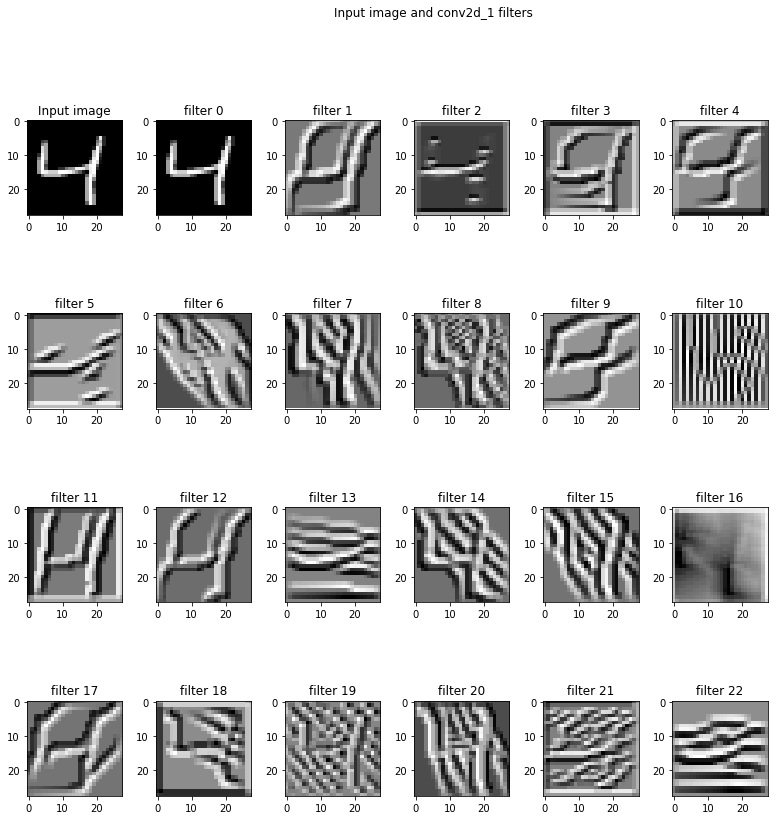

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()